In [1]:
import os
workDir = os.getcwd()
user = 'mkilpatr' #CERN user ID
institution = 'UCSB' #UCSB
print(workDir)

/Users/Matthew/Documents/SchoolWork/physics/GradNotes/ParticlePhysics/PostdocResearch/HGC/EstToolsSUSY/HGCStudies/Fiducials


In [2]:
%run utils/GetExcel.ipynb

#The sensor file can contain the fiducials of the sensor, but can also have the component heights 
#for sensor in location P1 or P2.
#Methods can run either way! 

pcbfile = workDir + '/data/pcbfiducialtrialrun.xls'
fiducialfile = workDir + '/data/GantryTrayFiducialData.xls'
#sensorfile = workDir + '/data/moduleHeights.xls'
sensorfile = workDir + '/data/Trial_CuW_300_bothLocations.xls'

sensor = GetExcel(sensorfile, True, [])
sensor.read()
#print(sensor.df.head())

fiducial = GetExcel(fiducialfile, True, [])
fiducial.read()
#print(fiducial.df.head())

pcb = GetExcel(pcbfile, True, [])
pcb.read()
#print(pcb.df.head())

FILEPATHS MAY BE WRONG!! CANNOT FIND /Users/Matthew/Documents/SchoolWork/physics/GradNotes/ParticlePhysics/PostdocResearch/HGC/EstToolsSUSY/HGCStudies/Fiducials/data/pcbfiducialtrialrun.xls


In [3]:
%run utils/ReadDataframe.ipynb

if sensor.exists:
    senDF = ReadDataframe(sensor.df, sensorfile)
    senDF.readComponentFiducials()
    senDF.readComponentHeights()

if fiducial.exists:
    fidDF = ReadDataframe(fiducial.df, fiducialfile)
    fidDF.readTrayFiducials()

if pcb.exists:
    pcbDF = ReadDataframe(pcb.df, pcbfile)
    pcbDF.readComponentFiducials()
    pcbDF.readComponentHeights()

In [4]:
%run utils/QualityControl.ipynb

if sensor.exists:
    sensorP1 = QualityControl(fidDF, senDF, 'P1', False)
    if len(senDF.pointsP1): sensorP1.runTransform()
    if len(senDF.heightP1): sensorP1.runHeights()
    sensorP1.rating()
    print(sensorP1)

    sensorP2 = QualityControl(fidDF, senDF, 'P2', False)
    if len(senDF.pointsP2): sensorP2.runTransform()
    if len(senDF.heightP2): sensorP2.runHeights()
    sensorP2.rating()
    print(sensorP2)
    
if pcb.exists:
    pcbP1 = QualityControl(fidDF, pcbDF, 'P1', True)
    if len(pcbDF.pointsP1): pcbP1.runTransform()
    if len(pcbDF.heightP1): pcbP1.runHeights()
    pcbP1.rating()
    print(pcbP1)

    pcbP2 = QualityControl(fidDF, pcbDF, 'P2', True)
    if len(pcbDF.pointsP2): pcbP2.runTransform()
    if len(pcbDF.heightP2): pcbP2.runHeights()
    pcbP2.rating()
    print(pcbP2)

The module/component in P1 has completed QC!
Rotation --> Left Fiducial: 90.292 degrees, Right Fiducial: 90.291 degrees
The angle of the sensor in position P1 is GREEN. 
Placement --> (x,y) = (0.075, -0.006) mm
The placement of the sensor in position P1 is YELLOW. 
Height --> 1.588 - (0.136) + (0.115) mm
The mean heights of the module in position P1 are GREEN. 
The minimum difference in height of the module in position P1 is RED. 
The maximum difference in height of the module in position P1 is RED. 

The FINAL rating of the module in position P1 is RED.

The module/component in P2 has completed QC!
Rotation --> Left Fiducial: 89.934 degrees, Right Fiducial: 89.934 degrees
The angle of the sensor in position P2 is GREEN. 
Placement --> (x,y) = (-0.034, 0.017) mm
The placement of the sensor in position P2 is GREEN. 
Height --> 1.659 - (0.307) + (0.263) mm
The mean heights of the module in position P2 are YELLOW. 
The minimum difference in height of the module in position P2 is RED. 
The

In [5]:
%run utils/CreateXML.ipynb

if sensor.exists:
    if sensorP1.finalRating != '':
        sensorP1XML = CreateXML(sensorP1, user, institution)
        sensorP1XML.save(senDF.dir, senDF.name + '_P1.xml')

    if sensorP2.finalRating != '':
        sensorP2XML = CreateXML(sensorP2, user, institution)
        sensorP2XML.save(senDF.dir, senDF.name + '_P2.xml')
    
if pcb.exists:
    if pcbP1.finalRating != '':
        pcbP1XML = CreateXML(pcbP1, user, institution)
        pcbP1XML.save(pcbDF.dir, pcbDF.name + '_P1.xml')
    
    if pcbP2.finalRating != '':
        pcbP2XML = CreateXML(pcbP2, user, institution)
        pcbP2XML.save(pcbDF.dir, pcbDF.name + '_P2.xml')

Saving UPLOAD XML file to  /Users/Matthew/Documents/SchoolWork/physics/GradNotes/ParticlePhysics/PostdocResearch/HGC/EstToolsSUSY/HGCStudies/Fiducials/data/Trial_CuW_300_bothLocations_P1_upload.xml
Saving UPLOAD XML file to  /Users/Matthew/Documents/SchoolWork/physics/GradNotes/ParticlePhysics/PostdocResearch/HGC/EstToolsSUSY/HGCStudies/Fiducials/data/Trial_CuW_300_bothLocations_P2_upload.xml


Trial_CuW_300_bothLocations_P2    {'Pad': [194, 191, 169, 156, 112, 96, 96, 52, ...
dtype: object
Plotting hexmaps
/Users/Matthew/Documents/SchoolWork/physics/GradNotes/ParticlePhysics/PostdocResearch/HGC/EstToolsSUSY/HGCStudies/Fiducials/data/Trial_CuW_300_bothLocations_P2_Height_OGP.png


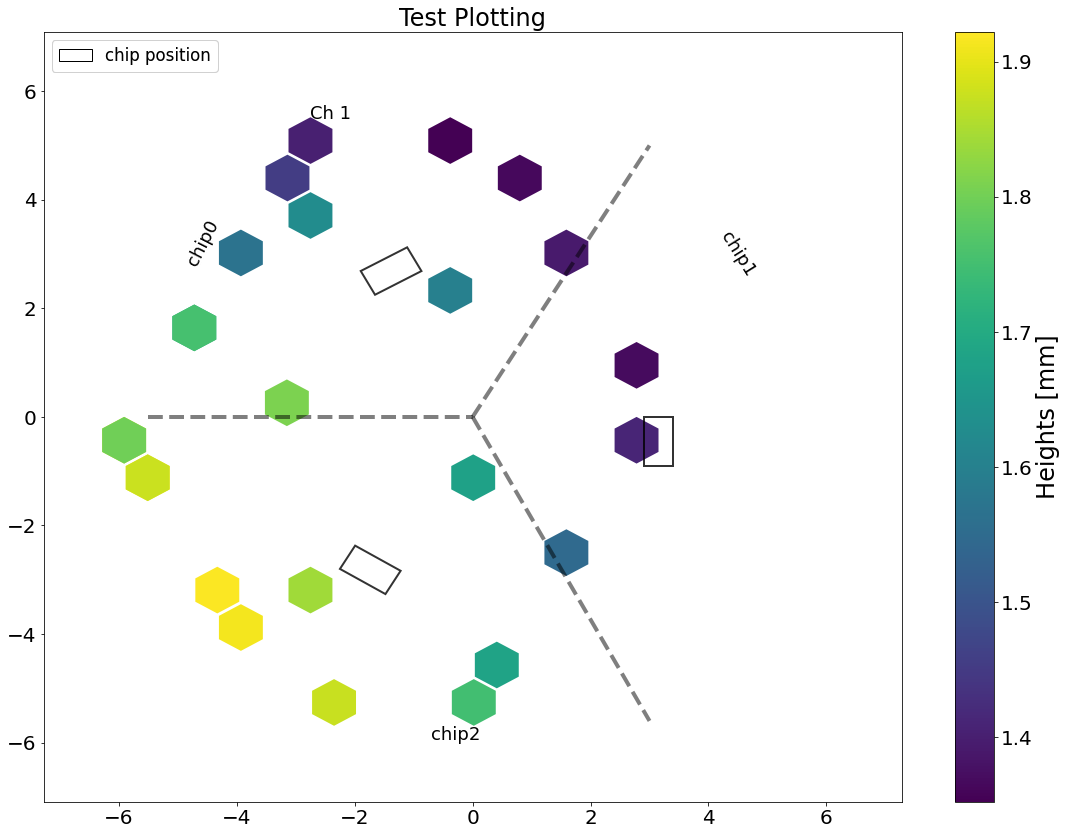

In [6]:
%run HeightPlotter.ipynb
%load_ext autoreload
%autoreload 2
if sensor.exists:
    label = "Test Plotting"
    senPlotP2 = HeightPlotter(sensorP2.hgts, sensorP2.hXY, senDF.name + '_P2', senDF.dir + '/', label)
    df = senPlotP2.padMapping()
    #%run ../../hexmap/plot_summary.py sensorfile -d senDF.dir --inputData df -l label -p 'Deformation' -m senDF.name